This notebook records a personal learning project in which a convnet is taught to ID right whales. 

# Planning

## Tasks

After agreeing to the rules of the competition, the following tasks must be completed by the notebook, in order:
* set up the data;
    - set up the 'train', 'test' folders, and the 'sample' folders 'train' and 'valid';
    - create a validation set;
    - create a sample set;
    - check that each class is in a separate folder;
* explore the data:
    - get some idea of how it is organised, what is available to use, dimensions, classes, etc.;
* set up the model:
    - establish which pre-trained model to use
    - import the model
    - load the pre-trained weights
* set up for fine-tuning:
    - remove output layer
    - append new output layer (n classes)
    - set the batch size
* train the network (sample data)
    

## Principles to follow

* record every step, marking which can be skipped on future runs (dependencies), e.g. using 'raw' format
* use relative folder referencing
* while remaining 'agile', look for easy opportunities to make the code reusable
* understand every line of code used
* experiment, to understand
* try for 30 mins, before looking for help

# Import packages, setup, instantiate vgg

In [1]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/_MDR/right_whales'

In [2]:
root_path = %pwd
root_path

'/home/mark/Study/dl.fast.ai/deeplearning1/_MDR/right_whales'

In [3]:
%matplotlib inline
import numpy as np

<strong> N.B. </strong> You'll need to ensure that the files...<strong>
* 'utils.py' (by fast.ai), 
* 'vgg16.py' (adapted by them?), and
* 'vgg16bn' </strong>
...are findable by python - e.g. present in the root of the current directory.

In [49]:
import utils
from utils import *

# Download, unzip, and organise the data 

First, we'll create the 'data' directory into which to load the Kaggle sets.

In [5]:
%ls

data/         Right_Whale_ID_Study.ipynb  utils.py    vgg16.py
__pycache__/  train.csv                   vgg16bn.py


## Download the data

<strong>N.B. Don't rerun this - it takes ~45 min!</strong>

## Create the folder structure

At this point, we're expecting that the current directory is '/home/mark/Study/dl.fast.ai/deeplearning1/_MDR/right_whales'. Let's check this, and look at what's already there.

In [25]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/_MDR/right_whales'

In [4]:
!tree -d

.
├── data
│   ├── sample
│   │   ├── train
│   │   └── valid
│   ├── test
│   ├── train
│   └── valid
└── __pycache__

8 directories


I'm not currently sure whether this is the 'best' way to do this, but we'll set the path variables this way, for now...

<strong>DO re-run this cell...</strong>

In [34]:
import os
all_data_path = "data/"
sampled_path = all_data_path + "sample/"

# The following allows for easy switching...
data_path = all_data_path   
#data_path = sampled_path      

%ls $data_path

imgs_subset.zip  sample_submission.csv.zip  train.csv      w_7489.jpg.zip
imgs.zip         test/                      train.csv.zip
sample/          train/                     valid/


N.B. the folder structure that we're aiming for (under the root folder for the project) looks like this:

Let's check that.

In [7]:
%pwd

'/home/mark/Study/dl.fast.ai/deeplearning1/_MDR/right_whales'

In [38]:
!tree -d

.
├── data
│   ├── sample
│   │   ├── imgs_subset
│   │   ├── train
│   │   └── valid
│   ├── subset
│   ├── test
│   ├── train
│   │   ├── imgs
│   │   ├── whale_00195
│   │   ├── whale_00442
│   │   ├── whale_02411
│   │   ├── whale_02608
│   │   ├── whale_02839
│   │   ├── whale_03103
│   │   ├── whale_03227
│   │   ├── whale_03623
│   │   ├── whale_03728
│   │   ├── whale_03935
│   │   ├── whale_03990
│   │   ├── whale_04373
│   │   ├── whale_04397
│   │   ├── whale_04435
│   │   ├── whale_04480
│   │   ├── whale_04540
│   │   ├── whale_05140
│   │   ├── whale_05349
│   │   ├── whale_05487
│   │   ├── whale_05661
│   │   ├── whale_05784
│   │   ├── whale_06069
│   │   ├── whale_06334
│   │   ├── whale_06339
│   │   ├── whale_06967
│   │   ├── whale_06997
│   │   ├── whale_07331
│   │   ├── whale_07483
│   │   ├── whale_07647
│   │   ├── whale_07808
│   │   ├── whale_07863
│   │   ├── whale_08017
│   │   ├── whale_08181
│   │   ├── whale_08324
│   │   ├── whale_08439
│   │   ├── wha

## Unzip the data 

Quoted from the Kaggle data page: 

<blockquote>In this competition you are given aerial images, each containing a single Right whale. These images were taken over the course of 10 years and hundreds of helicopter trips, and have been selected and labeled by NOAA scientists with their whale IDs.

To ensure that this is a computer vision problem, we have removed metadata such as creation dates and geo tags from the photos. To discourage hand labeling, we have supplemented the test dataset with some images that are resized, cropped, or flipped. These processed images are ignored and don't count towards your score.  

Your goal is to build a "face recognition system" for whales.</blockquote>
File descriptions

    imgs.zip - zipped folder of all (train/test) images
    train.csv - the training set with image file name and whale id. 
    sample_submission.csv - a sample submission file in the correct format
    imgs_subset.zip - zipped folder of a subset (first 500 images) of the full dataset


In [6]:
%ls -l $all_data_path

total 9558060
-rw-rw-r--   1 mark mark  417417422 May  1 17:12 imgs_subset.zip
-rw-rw-r--   1 mark mark 9368977087 May  1 17:13 imgs.zip
drwxrwxr-x   5 mark mark       4096 May  2 22:51 sample/
-rw-rw-r--   1 mark mark      50631 May  1 17:13 sample_submission.csv.zip
drwxrwxr-x   2 mark mark       4096 May  1 17:23 test/
drwxrwxr-x 431 mark mark      57344 May  2 18:34 train/
-rw-r--r--   1 mark mark     104008 Aug 28  2015 train.csv
-rw-rw-r--   1 mark mark      24696 May  1 17:13 train.csv.zip
drwxrwxr-x   2 mark mark       4096 May  1 17:23 valid/
-rw-rw-r--   1 mark mark     737173 May  1 17:13 w_7489.jpg.zip


Let's unzip the train.csv file first, and take a look at it.

So, it looks like the this file gives the correct whaleID for each image.

In [9]:
!head -n5 $all_data_path/train.csv

Image,whaleID
w_7812.jpg,whale_48813
w_4598.jpg,whale_09913
w_3828.jpg,whale_45062
w_8734.jpg,whale_74162


We need to identify each of the class names (whaleID) used, and - for each - create a folder for it, and save all examples into that folder. First we load in the full data linking image files to classes as an array, from the 'train.csv' file.

## Unzip the image data

## Import the file describing the image data

Iterate over the rows, creating a dictionary as you go.

In [7]:
import csv
reader = csv.reader(open('train.csv', 'r'))
class_data = {}
for k, v in reader:
   class_data[k] = v    

Here, the key is the filename, and the value is the ID. Some quick checks...

In [20]:
print(class_data['w_7812.jpg'])
# print(class_data['w_87.jpg'])  # not classified!

whale_48813


So when we find out how many classified images there are in this file...

In [19]:
print(len(class_data.keys()))

4545


Let's count the number of files under 'imgs' - it's over double the number of classified images!

In [18]:
DIR = all_data_path + 'train/imgs'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

11469


A function for checking for a folder name and creating one if needed.

In [14]:
import os
import errno

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

In [16]:
! tree -d data

data
├── sample
│   ├── train
│   └── valid
├── test
├── train
│   └── imgs
└── valid

7 directories


In [17]:
from shutil import copyfile    # N.B. destination must be the complete target file name

## Copy the training data into separate folders

For each ID, create a folder with that name, and copy all the files keyed to that ID into this folder.
NOTE that we use the information on whaleID to copy only those images that have been identified. Can't yet work out what I'd do with the others. Unsupervised learning? 

In [21]:
# for each ID, create a folder with that name, and copy all the files keyed to that ID into this folder 
for filename in class_data:
    source = all_data_path + 'train/imgs/' + filename
    tgt_dir = all_data_path + 'train/' + class_data[filename]
    print('Checking for (possibly creating) folder: ' + tgt_dir + '... ')
    make_sure_path_exists(tgt_dir)
    # print('Copying file: ' + source + ' into folder: ' + tgt_dir)
    copyfile(source, tgt_dir + '/' + filename)     

Checking for (possibly creating) folder: data/train/whale_17604... 
Checking for (possibly creating) folder: data/train/whale_46169... 
Checking for (possibly creating) folder: data/train/whale_31594... 
Checking for (possibly creating) folder: data/train/whale_08324... 
Checking for (possibly creating) folder: data/train/whale_17528... 
Checking for (possibly creating) folder: data/train/whale_87604... 
Checking for (possibly creating) folder: data/train/whale_48966... 
Checking for (possibly creating) folder: data/train/whale_59255... 
Checking for (possibly creating) folder: data/train/whale_38681... 
Checking for (possibly creating) folder: data/train/whale_69619... 
Checking for (possibly creating) folder: data/train/whale_87622... 
Checking for (possibly creating) folder: data/train/whale_35844... 
Checking for (possibly creating) folder: data/train/whale_53079... 
Checking for (possibly creating) folder: data/train/whale_12820... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_48813... 
Checking for (possibly creating) folder: data/train/whale_47734... 
Checking for (possibly creating) folder: data/train/whale_34663... 
Checking for (possibly creating) folder: data/train/whale_95370... 
Checking for (possibly creating) folder: data/train/whale_36231... 
Checking for (possibly creating) folder: data/train/whale_22059... 
Checking for (possibly creating) folder: data/train/whale_89456... 
Checking for (possibly creating) folder: data/train/whale_19041... 
Checking for (possibly creating) folder: data/train/whale_89615... 
Checking for (possibly creating) folder: data/train/whale_71554... 
Checking for (possibly creating) folder: data/train/whale_23821... 
Checking for (possibly creating) folder: data/train/whale_45294... 
Checking for (possibly creating) folder: data/train/whale_17604... 
Checking for (possibly creating) folder: data/train/whale_24458... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_09181... 
Checking for (possibly creating) folder: data/train/whale_60921... 
Checking for (possibly creating) folder: data/train/whale_91826... 
Checking for (possibly creating) folder: data/train/whale_23467... 
Checking for (possibly creating) folder: data/train/whale_52759... 
Checking for (possibly creating) folder: data/train/whale_17604... 
Checking for (possibly creating) folder: data/train/whale_36437... 
Checking for (possibly creating) folder: data/train/whale_83157... 
Checking for (possibly creating) folder: data/train/whale_80247... 
Checking for (possibly creating) folder: data/train/whale_95370... 
Checking for (possibly creating) folder: data/train/whale_33195... 
Checking for (possibly creating) folder: data/train/whale_48966... 
Checking for (possibly creating) folder: data/train/whale_99243... 
Checking for (possibly creating) folder: data/train/whale_73080... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_88756... 
Checking for (possibly creating) folder: data/train/whale_10021... 
Checking for (possibly creating) folder: data/train/whale_11076... 
Checking for (possibly creating) folder: data/train/whale_65586... 
Checking for (possibly creating) folder: data/train/whale_65057... 
Checking for (possibly creating) folder: data/train/whale_23525... 
Checking for (possibly creating) folder: data/train/whale_06334... 
Checking for (possibly creating) folder: data/train/whale_34488... 
Checking for (possibly creating) folder: data/train/whale_62655... 
Checking for (possibly creating) folder: data/train/whale_67036... 
Checking for (possibly creating) folder: data/train/whale_89541... 
Checking for (possibly creating) folder: data/train/whale_82602... 
Checking for (possibly creating) folder: data/train/whale_90957... 
Checking for (possibly creating) folder: data/train/whale_81768... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_52100... 
Checking for (possibly creating) folder: data/train/whale_46169... 
Checking for (possibly creating) folder: data/train/whale_77693... 
Checking for (possibly creating) folder: data/train/whale_24458... 
Checking for (possibly creating) folder: data/train/whale_26397... 
Checking for (possibly creating) folder: data/train/whale_08637... 
Checking for (possibly creating) folder: data/train/whale_73136... 
Checking for (possibly creating) folder: data/train/whale_99558... 
Checking for (possibly creating) folder: data/train/whale_66852... 
Checking for (possibly creating) folder: data/train/whale_05349... 
Checking for (possibly creating) folder: data/train/whale_84178... 
Checking for (possibly creating) folder: data/train/whale_33152... 
Checking for (possibly creating) folder: data/train/whale_43045... 
Checking for (possibly creating) folder: data/train/whale_23855... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_52342... 
Checking for (possibly creating) folder: data/train/whale_48490... 
Checking for (possibly creating) folder: data/train/whale_73080... 
Checking for (possibly creating) folder: data/train/whale_13789... 
Checking for (possibly creating) folder: data/train/whale_99326... 
Checking for (possibly creating) folder: data/train/whale_92153... 
Checking for (possibly creating) folder: data/train/whale_11076... 
Checking for (possibly creating) folder: data/train/whale_34663... 
Checking for (possibly creating) folder: data/train/whale_10583... 
Checking for (possibly creating) folder: data/train/whale_64526... 
Checking for (possibly creating) folder: data/train/whale_35594... 
Checking for (possibly creating) folder: data/train/whale_82089... 
Checking for (possibly creating) folder: data/train/whale_69619... 
Checking for (possibly creating) folder: data/train/whale_32021... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_22448... 
Checking for (possibly creating) folder: data/train/whale_90271... 
Checking for (possibly creating) folder: data/train/whale_47062... 
Checking for (possibly creating) folder: data/train/whale_24458... 
Checking for (possibly creating) folder: data/train/whale_90911... 
Checking for (possibly creating) folder: data/train/whale_53580... 
Checking for (possibly creating) folder: data/train/whale_81960... 
Checking for (possibly creating) folder: data/train/whale_64714... 
Checking for (possibly creating) folder: data/train/whale_50021... 
Checking for (possibly creating) folder: data/train/whale_98618... 
Checking for (possibly creating) folder: data/train/whale_87291... 
Checking for (possibly creating) folder: data/train/whale_58309... 
Checking for (possibly creating) folder: data/train/whale_67614... 
Checking for (possibly creating) folder: data/train/whale_78565... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_59173... 
Checking for (possibly creating) folder: data/train/whale_82602... 
Checking for (possibly creating) folder: data/train/whale_43961... 
Checking for (possibly creating) folder: data/train/whale_95831... 
Checking for (possibly creating) folder: data/train/whale_49877... 
Checking for (possibly creating) folder: data/train/whale_14094... 
Checking for (possibly creating) folder: data/train/whale_66353... 
Checking for (possibly creating) folder: data/train/whale_32198... 
Checking for (possibly creating) folder: data/train/whale_99573... 
Checking for (possibly creating) folder: data/train/whale_28384... 
Checking for (possibly creating) folder: data/train/whale_43045... 
Checking for (possibly creating) folder: data/train/whale_39293... 
Checking for (possibly creating) folder: data/train/whale_72235... 
Checking for (possibly creating) folder: data/train/whale_88147... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_07647... 
Checking for (possibly creating) folder: data/train/whale_98746... 
Checking for (possibly creating) folder: data/train/whale_49877... 
Checking for (possibly creating) folder: data/train/whale_52749... 
Checking for (possibly creating) folder: data/train/whale_48386... 
Checking for (possibly creating) folder: data/train/whale_40190... 
Checking for (possibly creating) folder: data/train/whale_64714... 
Checking for (possibly creating) folder: data/train/whale_87604... 
Checking for (possibly creating) folder: data/train/whale_77693... 
Checking for (possibly creating) folder: data/train/whale_63948... 
Checking for (possibly creating) folder: data/train/whale_95370... 
Checking for (possibly creating) folder: data/train/whale_89541... 
Checking for (possibly creating) folder: data/train/whale_60451... 
Checking for (possibly creating) folder: data/train/whale_69459... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_82064... 
Checking for (possibly creating) folder: data/train/whale_88147... 
Checking for (possibly creating) folder: data/train/whale_78372... 
Checking for (possibly creating) folder: data/train/whale_64989... 
Checking for (possibly creating) folder: data/train/whale_89456... 
Checking for (possibly creating) folder: data/train/whale_64634... 
Checking for (possibly creating) folder: data/train/whale_38288... 
Checking for (possibly creating) folder: data/train/whale_34656... 
Checking for (possibly creating) folder: data/train/whale_95091... 
Checking for (possibly creating) folder: data/train/whale_90377... 
Checking for (possibly creating) folder: data/train/whale_86377... 
Checking for (possibly creating) folder: data/train/whale_74232... 
Checking for (possibly creating) folder: data/train/whale_38906... 
Checking for (possibly creating) folder: data/train/whale_80247... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_38008... 
Checking for (possibly creating) folder: data/train/whale_89456... 
Checking for (possibly creating) folder: data/train/whale_43971... 
Checking for (possibly creating) folder: data/train/whale_48813... 
Checking for (possibly creating) folder: data/train/whale_58972... 
Checking for (possibly creating) folder: data/train/whale_53889... 
Checking for (possibly creating) folder: data/train/whale_25715... 
Checking for (possibly creating) folder: data/train/whale_66353... 
Checking for (possibly creating) folder: data/train/whale_78395... 
Checking for (possibly creating) folder: data/train/whale_75932... 
Checking for (possibly creating) folder: data/train/whale_78565... 
Checking for (possibly creating) folder: data/train/whale_29294... 
Checking for (possibly creating) folder: data/train/whale_55079... 
Checking for (possibly creating) folder: data/train/whale_81768... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_08439... 
Checking for (possibly creating) folder: data/train/whale_79199... 
Checking for (possibly creating) folder: data/train/whale_38008... 
Checking for (possibly creating) folder: data/train/whale_52505... 
Checking for (possibly creating) folder: data/train/whale_63948... 
Checking for (possibly creating) folder: data/train/whale_52505... 
Checking for (possibly creating) folder: data/train/whale_46974... 
Checking for (possibly creating) folder: data/train/whale_48497... 
Checking for (possibly creating) folder: data/train/whale_80124... 
Checking for (possibly creating) folder: data/train/whale_69459... 
Checking for (possibly creating) folder: data/train/whale_18989... 
Checking for (possibly creating) folder: data/train/whale_78372... 
Checking for (possibly creating) folder: data/train/whale_72820... 
Checking for (possibly creating) folder: data/train/whale_84178... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_90957... 
Checking for (possibly creating) folder: data/train/whale_48813... 
Checking for (possibly creating) folder: data/train/whale_98151... 
Checking for (possibly creating) folder: data/train/whale_98996... 
Checking for (possibly creating) folder: data/train/whale_37154... 
Checking for (possibly creating) folder: data/train/whale_10583... 
Checking for (possibly creating) folder: data/train/whale_43961... 
Checking for (possibly creating) folder: data/train/whale_79199... 
Checking for (possibly creating) folder: data/train/whale_03623... 
Checking for (possibly creating) folder: data/train/whale_84178... 
Checking for (possibly creating) folder: data/train/whale_50021... 
Checking for (possibly creating) folder: data/train/whale_82387... 
Checking for (possibly creating) folder: data/train/whale_72820... 
Checking for (possibly creating) folder: data/train/whale_19906... 
Checking for (possibly creating) folder: data/tr

Checking for (possibly creating) folder: data/train/whale_88547... 
Checking for (possibly creating) folder: data/train/whale_38008... 
Checking for (possibly creating) folder: data/train/whale_73666... 
Checking for (possibly creating) folder: data/train/whale_95370... 
Checking for (possibly creating) folder: data/train/whale_47858... 
Checking for (possibly creating) folder: data/train/whale_78628... 
Checking for (possibly creating) folder: data/train/whale_50021... 
Checking for (possibly creating) folder: data/train/whale_32702... 
Checking for (possibly creating) folder: data/train/whale_87291... 
Checking for (possibly creating) folder: data/train/whale_63948... 
Checking for (possibly creating) folder: data/train/whale_52749... 
Checking for (possibly creating) folder: data/train/whale_69084... 
Checking for (possibly creating) folder: data/train/whale_06967... 
Checking for (possibly creating) folder: data/train/whale_84178... 
Checking for (possibly creating) folder: data/tr

FileNotFoundError: [Errno 2] No such file or directory: 'data/train/imgs/w_7489.jpg'

## Unzip the provided 'subset' data sample file

In [23]:
%ls $data_path

imgs_subset.zip  sample_submission.csv.zip  train.csv      w_7489.jpg.zip
imgs.zip         test/                      train.csv.zip
sample/          train/                     valid/


In [24]:
!unzip $all_data_path/imgs_subset.zip -d $all_data_path/sample

Archive:  data//imgs_subset.zip
   creating: data//sample/imgs_subset/
  inflating: data//sample/imgs_subset/w_0.jpg  
  inflating: data//sample/imgs_subset/w_1.jpg  
  inflating: data//sample/imgs_subset/w_10.jpg  
  inflating: data//sample/imgs_subset/w_100.jpg  
  inflating: data//sample/imgs_subset/w_101.jpg  
  inflating: data//sample/imgs_subset/w_102.jpg  
  inflating: data//sample/imgs_subset/w_103.jpg  
  inflating: data//sample/imgs_subset/w_104.jpg  
  inflating: data//sample/imgs_subset/w_105.jpg  
  inflating: data//sample/imgs_subset/w_106.jpg  
  inflating: data//sample/imgs_subset/w_107.jpg  
  inflating: data//sample/imgs_subset/w_108.jpg  
  inflating: data//sample/imgs_subset/w_109.jpg  
  inflating: data//sample/imgs_subset/w_11.jpg  
  inflating: data//sample/imgs_subset/w_110.jpg  
  inflating: data//sample/imgs_subset/w_111.jpg  
  inflating: data//sample/imgs_subset/w_112.jpg  
  inflating: data//sample/imgs_subset/w_113.jpg  
  inflating: data//sample/imgs_subs

  inflating: data//sample/imgs_subset/w_245.jpg  
  inflating: data//sample/imgs_subset/w_246.jpg  
 extracting: data//sample/imgs_subset/w_247.jpg  
  inflating: data//sample/imgs_subset/w_248.jpg  
  inflating: data//sample/imgs_subset/w_249.jpg  
  inflating: data//sample/imgs_subset/w_25.jpg  
  inflating: data//sample/imgs_subset/w_250.jpg  
  inflating: data//sample/imgs_subset/w_251.jpg  
  inflating: data//sample/imgs_subset/w_252.jpg  
  inflating: data//sample/imgs_subset/w_253.jpg  
  inflating: data//sample/imgs_subset/w_254.jpg  
  inflating: data//sample/imgs_subset/w_255.jpg  
  inflating: data//sample/imgs_subset/w_256.jpg  
  inflating: data//sample/imgs_subset/w_257.jpg  
  inflating: data//sample/imgs_subset/w_258.jpg  
  inflating: data//sample/imgs_subset/w_259.jpg  
  inflating: data//sample/imgs_subset/w_26.jpg  
  inflating: data//sample/imgs_subset/w_260.jpg  
 extracting: data//sample/imgs_subset/w_261.jpg  
  inflating: data//sample/imgs_subset/w_262.jpg  
  

 extracting: data//sample/imgs_subset/w_399.jpg  
  inflating: data//sample/imgs_subset/w_4.jpg  
  inflating: data//sample/imgs_subset/w_40.jpg  
  inflating: data//sample/imgs_subset/w_400.jpg  
  inflating: data//sample/imgs_subset/w_401.jpg  
  inflating: data//sample/imgs_subset/w_402.jpg  
  inflating: data//sample/imgs_subset/w_403.jpg  
  inflating: data//sample/imgs_subset/w_404.jpg  
  inflating: data//sample/imgs_subset/w_405.jpg  
  inflating: data//sample/imgs_subset/w_406.jpg  
  inflating: data//sample/imgs_subset/w_407.jpg  
  inflating: data//sample/imgs_subset/w_408.jpg  
  inflating: data//sample/imgs_subset/w_409.jpg  
  inflating: data//sample/imgs_subset/w_41.jpg  
  inflating: data//sample/imgs_subset/w_410.jpg  
  inflating: data//sample/imgs_subset/w_411.jpg  
  inflating: data//sample/imgs_subset/w_412.jpg  
  inflating: data//sample/imgs_subset/w_413.jpg  
  inflating: data//sample/imgs_subset/w_414.jpg  
  inflating: data//sample/imgs_subset/w_415.jpg  
  in

## Copy the 'subset' data sample into separate folders (fails - see below)

Get the names of the files in the subset

In [10]:
# for each ID, create a folder with that name, and copy all the files keyed to that ID into this folder 
src = sampled_path + 'imgs_subset/' 
g = glob(src +'w_*.jpg')
print(len(g))
print(g[:5])

500
['data/sample/imgs_subset/w_87.jpg', 'data/sample/imgs_subset/w_332.jpg', 'data/sample/imgs_subset/w_78.jpg', 'data/sample/imgs_subset/w_141.jpg', 'data/sample/imgs_subset/w_336.jpg']


In [11]:
sampled_path

'data/sample/'

It's clear that calling glob from a higher-level directory has preserved the local path to each file. We'll strip these to make the saving to folders process work. First, let's check we've got it right.

In [12]:
print (g[1])
foo = g[1].replace("data/sample/imgs_subset/", "")
print (foo)

data/sample/imgs_subset/w_332.jpg
w_332.jpg


In [13]:
for src in g:
    filename = src.replace("data/sample/imgs_subset/", "")
    print(filename)
    tgt_dir = sampled_path + 'train/' + class_data[filename]
    print('Checking for (possibly creating) folder: ' + tgt_dir + '... ')
    # make_sure_path_exists(tgt_dir)
    print('Copying file: ' + src + ' into folder: ' + tgt_dir)
    # copyfile(src, tgt_dir + '/' + filename)     

w_87.jpg


KeyError: 'w_87.jpg'

So, it turns out that both image sets - the full set, and the sample - contain images (such as 'w_87.jpg') that don't have classification information provided. For the purposes of this experiment, it's going to be worth sampling from the already-copied set instead!

## (Better:) Create a sample, from the full set, on which to test the code

Now we need to copy a random sample of the image files into the sample directories, so that we can test the code quickly.

First, a quick reminder of the file structure.

In [41]:
%ls $all_data_path

imgs_subset.zip  sample_submission.csv.zip  train/         valid/
imgs.zip         subset/                    train.csv      w_7489.jpg.zip
sample/          test/                      train.csv.zip


In [57]:
!tree -d $all_data_path

data/
├── imgs
│   └── imgs
├── sample
│   ├── imgs
│   ├── train
│   └── valid
├── subset
│   └── imgs_subset
├── test
├── train
│   ├── whale_00195
│   ├── whale_00442
│   ├── whale_02411
│   ├── whale_02608
│   ├── whale_02839
│   ├── whale_03103
│   ├── whale_03227
│   ├── whale_03623
│   ├── whale_03728
│   ├── whale_03935
│   ├── whale_03990
│   ├── whale_04373
│   ├── whale_04397
│   ├── whale_04435
│   ├── whale_04480
│   ├── whale_04540
│   ├── whale_05140
│   ├── whale_05349
│   ├── whale_05487
│   ├── whale_05661
│   ├── whale_05784
│   ├── whale_06069
│   ├── whale_06334
│   ├── whale_06339
│   ├── whale_06967
│   ├── whale_06997
│   ├── whale_07331
│   ├── whale_07483
│   ├── whale_07647
│   ├── whale_07808
│   ├── whale_07863
│   ├── whale_08017
│   ├── whale_08181
│   ├── whale_08324
│   ├── whale_08439
│   ├── whale_08637
│   ├── whale_08700
│   ├── whale_08729
│   ├── whale_08923
│   ├── whale_09062
│   ├── whale_09181
│   ├── whale_09454
│   ├── whale_09651
│   ├── wh

In [47]:
src = os.path.join(all_data_path + 'train/imgs', '*.jpg')
print(src)
g = glob(src)
print(len(g))
shuf = np.random.permutation(g) 
print(g[:3])

data/train/imgs/*.jpg
11468
['data/train/imgs/w_6396.jpg', 'data/train/imgs/w_10650.jpg', 'data/train/imgs/w_4073.jpg']


In [48]:
tgt = os.path.join(sampled_path)
print (tgt)

data/sample/


On reflection, it seems less clear that there's a real benefit to running the training process on a sample, when there are so many classes to learn. For now, I'll skip this bit.

## Moving the 'imgs' folder out of 'train'

I think this might be needed, to ensure that Keras doesn't think 'imgs' is a class.

In [56]:
src = os.path.join(all_data_path + 'train/imgs')
tgt = os.path.join(all_data_path + 'imgs')
%mv $src $tgt

# Setting up the model

A reminder of the steps to come:

* set up the model:
    - establish which pre-trained model to use
    - import the model
    - load the pre-trained weights
* set up for fine-tuning:
    - remove output layer
    - append new output layer (n classes)
    - set the batch size
* train the network (sample data)

First, we create a Vgg16 object:

In [62]:
import vgg16               # this is the package
from vgg16 import Vgg16    # this is the class defining the model
vgg = Vgg16()                # instantiates a 'Vgg16' object (remember the parentheses!)

And we grab some batches from the training folder.

In [66]:
src = os.path.join(all_data_path + 'train')
print(src)
batches = vgg.get_batches(path=src, batch_size=1)

data/train
Found 2218 images belonging to 428 classes.


Er. Woooo!

In [67]:
imgs,labels = next(batches)

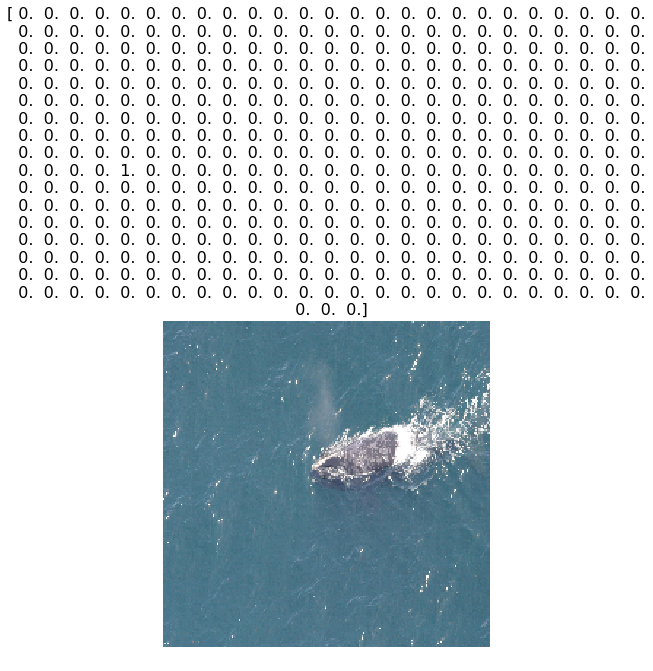

In [68]:
plots(imgs, titles=labels)